# Analysing how attributes of  popular (*Western*) music has changed over time

## Summary

Using the Spotify Web API to gather the Top 25 songs of each year from 1970-2020, looking at the **Feature Information** of the tracks and analysing any trends in songs attributes seen over the years. 

- **Feature Information / Attributes**:
    - '**danceability**, '**energy**', '**key**', '**loudness**', 'mode', 'speechiness','acousticness', '**instrumentalness**', 'liveness', 'valence', 'tempo','type', 'id', 'uri', 'track_href', 'analysis_url', '**duration_ms**','time_signature', 'Placement', 'Year', 'Name', 'minutes', 'seconds'



- **Key Questions:**
    - *Averages of Key Attributes were taken for top 25 songs and plotted against year.*
        - Has there been a change in the "Danceability" of a song throughout the years?
        - Are songs nowadays shorter than they used to be?
            - Hypothesis test was done on whether *Songs in the last Decade are shorter than those in the 1970s (1970-1980)*. 
        - Has the Tonality of songs differed from what it used to be?
        - Are songs more energetic now than they used to be?
        - How has the Loudness of songs changed?
        - What Artists have appeared in the Top 25 Songs the most frequent?


This information could be useful for:
- Predicting what songs will be highest contenders for being in the top. 
- Artists tailoring their sound to follow what popular songs do


In [1]:
import requests
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import ticker
from scipy import stats

In [2]:
client_id = 'b8d456b85eca4a69b945f18e285e124c'
client_secret = 'f4401bbb2db744d491dc820d89da66e2'
redirect_url = 'http://localhost:9000/' #redirect uri a route of our app the Spotify Accounts Service to redirect the user to once they've authorized our app
AUTH_URL = 'https://accounts.spotify.com/api/token'

## Post Request

In [3]:
# POST
auth_response = requests.post(AUTH_URL, {
    'grant_type': 'client_credentials',
    'client_id': client_id,
    'client_secret': client_secret,
})

In [4]:
auth_response

<Response [200]>

In [5]:
auth_response_data = auth_response.json() #Convert to Json format
auth_response_data

{'access_token': 'BQCjnkhL5c5o-A2Z_nf8vMgL_UlGcJTDnYn-UpGcBhdB_-OxC3_OiTXuPsx2Lp-VWDMELHp0rG17FVXfj-op4t7nhxgsX0OqUjPG_62j_xWsIUuxFQlH',
 'token_type': 'Bearer',
 'expires_in': 3600}

In [6]:
# save the access token
access_token = auth_response_data['access_token']

Spotify Endpoints = https://developer.spotify.com/documentation/web-api/reference/#/operations/get-an-album

In [7]:
# base URL of all Spotify API endpoints
BASE_URL = 'https://api.spotify.com/v1/'

In [8]:
headers = {
    'Authorization': 'Bearer {token}'.format(token=access_token)
}

## Get Requests

## Get All Playlists of Top songs from 1970-Now

In [9]:
# Loop through all years from 1990 till 2020
start_year = 1970 #Initalise starting year
end_year = 2020 #Initalise ending year (excl)

user_arr = []
playlist_arr = []
year_arr = [] #Used to put in constructed DF to determine what year each song is from

for year in range(start_year, end_year+1):
    r = requests.get(BASE_URL + f'search?query=top+hits+of+{year}&type=playlist&locale=en-US%2Cen%3Bq%3D0.5&offset=0&limit=20', headers=headers)
    play_dict = json.loads(r.text)['playlists']['items'] #Getting the main details into python dict
    
    #Loop through Dictionary to get the appropiate playlists
    for user in play_dict:
        user_id = user['owner']['id']
        if user_id == 'spotify' and user['name'] == f'Top Hits of {year}':
            playlist_id = user['id']
            print(user_id,user['name'],playlist_id)
            playlist_arr.append(playlist_id)
            year_arr.append(year)
print(year)
playlist_arr
year_arr

spotify Top Hits of 1970 37i9dQZF1DWXQyLTHGuTIz
spotify Top Hits of 1971 37i9dQZF1DX43B4ApmA3Ee
spotify Top Hits of 1972 37i9dQZF1DXaQBa5hAMckp
spotify Top Hits of 1973 37i9dQZF1DX2ExTChOnD3g
spotify Top Hits of 1974 37i9dQZF1DWVg6L7Yq13eC
spotify Top Hits of 1975 37i9dQZF1DX3TYyWu8Zk7P
spotify Top Hits of 1976 37i9dQZF1DX6rhG68uMHxl
spotify Top Hits of 1977 37i9dQZF1DX26cozX10stk
spotify Top Hits of 1978 37i9dQZF1DX0fr2A59qlzT
spotify Top Hits of 1979 37i9dQZF1DWZLO9LcfSmxX
spotify Top Hits of 1980 37i9dQZF1DWXbLOeOIhbc5
spotify Top Hits of 1981 37i9dQZF1DX3MaR62kDrX7
spotify Top Hits of 1982 37i9dQZF1DXas7qFgKz9OV
spotify Top Hits of 1983 37i9dQZF1DXbE3rNuDfpVj
spotify Top Hits of 1984 37i9dQZF1DX2O7iyPnNKby
spotify Top Hits of 1985 37i9dQZF1DWXZ5eJ1sVtmf
spotify Top Hits of 1986 37i9dQZF1DX7b12kdMQTpG
spotify Top Hits of 1987 37i9dQZF1DX38yySwWsFRT
spotify Top Hits of 1988 37i9dQZF1DX3MZ9dVGvZnZ
spotify Top Hits of 1989 37i9dQZF1DX4qJrOCfJytN
spotify Top Hits of 1990 37i9dQZF1DX4joP

[1970,
 1971,
 1972,
 1973,
 1974,
 1975,
 1976,
 1977,
 1978,
 1979,
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019]

In [10]:
playlist_arr

['37i9dQZF1DWXQyLTHGuTIz',
 '37i9dQZF1DX43B4ApmA3Ee',
 '37i9dQZF1DXaQBa5hAMckp',
 '37i9dQZF1DX2ExTChOnD3g',
 '37i9dQZF1DWVg6L7Yq13eC',
 '37i9dQZF1DX3TYyWu8Zk7P',
 '37i9dQZF1DX6rhG68uMHxl',
 '37i9dQZF1DX26cozX10stk',
 '37i9dQZF1DX0fr2A59qlzT',
 '37i9dQZF1DWZLO9LcfSmxX',
 '37i9dQZF1DWXbLOeOIhbc5',
 '37i9dQZF1DX3MaR62kDrX7',
 '37i9dQZF1DXas7qFgKz9OV',
 '37i9dQZF1DXbE3rNuDfpVj',
 '37i9dQZF1DX2O7iyPnNKby',
 '37i9dQZF1DWXZ5eJ1sVtmf',
 '37i9dQZF1DX7b12kdMQTpG',
 '37i9dQZF1DX38yySwWsFRT',
 '37i9dQZF1DX3MZ9dVGvZnZ',
 '37i9dQZF1DX4qJrOCfJytN',
 '37i9dQZF1DX4joPVMjBCAo',
 '37i9dQZF1DX6TtJfRD994c',
 '37i9dQZF1DX9ZZCtVNwklG',
 '37i9dQZF1DXbUFx5bcjwWK',
 '37i9dQZF1DXbKFudfYGcmj',
 '37i9dQZF1DXayIOFUOVODK',
 '37i9dQZF1DWZkDl55BkJmo',
 '37i9dQZF1DWWKd15PHZNnl',
 '37i9dQZF1DWWmGB2u14f8m',
 '37i9dQZF1DX4PrR66miO50',
 '37i9dQZF1DWUZv12GM5cFk',
 '37i9dQZF1DX9Ol4tZWPH6V',
 '37i9dQZF1DX0P7PzzKwEKl',
 '37i9dQZF1DXaW8fzPh9b08',
 '37i9dQZF1DWTWdbR13PQYH',
 '37i9dQZF1DWWzQTBs5BHX9',
 '37i9dQZF1DX1vSJnMeoy3V',
 

## Get Top 25 Tracks From Each Year

N.B: Top tracks were taken from a spotify curated list of top 100 tracks of that year. It may not include all popular tracks from 1970 as it may not be on spotify. When looking at other websites that state the top songs for particular years it is not exactly the same structure as what is gathered here but similar.

In [11]:
track_arr = []
new_year_arr = [] #A new array is needed as the year needs to be repeated however many times we are taking the songs from
name_arr = [] #Creating an array for the name of the song to add to the dataframe
song_chart_arr = [] #Creating an array for the song chart placement of the song to add to the dataframe
artist_name_arr = []
year = 0
album_popularity = []
genre_arr = []
i=0
for playlist_id in playlist_arr:
    song_chart = 1 #initialising the song placement from the top 25 songs on a certain playlist
    r = requests.get(BASE_URL + 'playlists/' + playlist_id + '/tracks', headers=headers,params = {'limit' : 25}) #Get top 25 tracks
    song_dict = json.loads(r.text)['items'] #Getting the main details into python dict
    
    #Get all tracks from the items list
    for track in song_dict:
        track_href = track['track']['id'] #Getting the Sptofiy ID of the track
        track_arr.append(track_href)
        new_year_arr.append(year_arr[year])
        name_arr.append(track['track']['name']) #Getting the name of the track
        song_chart_arr.append(song_chart)
        song_chart += 1
        
#--------------------------------------------------------------------------------------------------------------------
        #Get Artist Names
        artist_name = [artist['name'] for artist in track['track']['artists']] #Get multiple artists if there aree
        print(artist_name)
        artist_name_arr.append(artist_name)
        
#-------------------------------------------------------------------------------------------------------------------
        #Get Album of Track and Popularity of Album
        
        r_song_album_id = track['track']['album']['id'] #Converting to a python dictionary and getting album ID
        print("album id: ", r_song_album_id)
        album_pop = requests.get(BASE_URL + 'albums/' + r_song_album_id, headers=headers)
#         print("album id: ", r_song_album_id)

        try:
            popularity = json.loads(album_pop.text)['popularity']
    #         genre = json.loads(album_pop.text)['genres']

        except KeyError:
            print("Key Error")
            popularity = 0
    #         genre = []

        album_popularity.append(popularity)
    #     genre_arr.append(genre)

        print("Pop: ",popularity)
    #     print("Genre: ",genre)
        print("Remaining:", (len(song_dict) - i))
        i += 1

        

    year += 1


['The Beatles']
album id:  0jTGHV5xqHPvEcwL8f6YU5
Pop:  75
Remaining: 25
['Simon & Garfunkel']
album id:  0JwHz5SSvpYWuuCNbtYZoV
Pop:  75
Remaining: 24
['Aretha Franklin']
album id:  27psmgscZCLbePqHMFgm62
Pop:  43
Remaining: 23
['Creedence Clearwater Revival']
album id:  4GLxEXWI3JiRKp6H7bfTIK
Pop:  68
Remaining: 22
['Joni Mitchell']
album id:  7JOdtLDLyXJIppDRB7kxr9
Pop:  0
Remaining: 21
['The Jackson 5']
album id:  51uoKRa8vT5SULrlF8s2t1
Pop:  71
Remaining: 20
['John Lennon', 'Yoko Ono']
album id:  0nYrjKixKaREskGL449EqU
Pop:  51
Remaining: 19
['Carpenters']
album id:  1CsuCA05y9r7ftG9bGGtWV
Pop:  58
Remaining: 18
['Stevie Wonder']
album id:  54ootLtDyMZFr9obtWQvvO
Pop:  71
Remaining: 17
['Edison Lighthouse']
album id:  4XDWk7zU6KDgLaqLxEYi8y
Pop:  68
Remaining: 16
['Van Morrison']
album id:  5PfnCqRbdfIDMb1x3MPQam
Pop:  68
Remaining: 15
['Norman Greenbaum']
album id:  05qYXT9UP6pXR9u0BtntD1
Pop:  67
Remaining: 14
['Black Sabbath']
album id:  6r7LZXAVueS5DqdrvXJJK7
Pop:  71
Remainin

Pop:  68
Remaining: -84
['Elton John']
album id:  5WupqgR68HfuHt3BMJtgun
Pop:  76
Remaining: -85
['David Bowie']
album id:  72mfhbEsMtXR6s7v9UhKe3
Pop:  67
Remaining: -86
['Jim Croce']
album id:  3L9sVl5T7UpFK6tNeEiXdy
Pop:  72
Remaining: -87
['Blue Swede', 'Björn Skifs']
album id:  6fBMaH0IiymemwFKmn18Ze
Pop:  65
Remaining: -88
['Bachman-Turner Overdrive']
album id:  3TtCMt4XLddj9PQeVBfsK1
Pop:  65
Remaining: -89
['Wings']
album id:  257oomaawruFknt5wYCPDh
Pop:  67
Remaining: -90
['Gordon Lightfoot']
album id:  2IPD9EcNjUmsHvqULDMU9Y
Pop:  63
Remaining: -91
['Barry White']
album id:  42Si9RbdXYGWQsfNTzjlnG
Pop:  63
Remaining: -92
['Carl Douglas']
album id:  7wA3s9ug9RoJXi9qGQbSjX
Pop:  60
Remaining: -93
['Neil Sedaka']
album id:  4MQXUCdpFPqi1jsM4N8aSR
Pop:  60
Remaining: -94
['Jim Croce']
album id:  4ieaeNOAdq6VoYQrY0hkhq
Pop:  65
Remaining: -95
['Bachman-Turner Overdrive']
album id:  1p2tbwfEfN8kZNOi4F3bGH
Pop:  61
Remaining: -96
['Harry Chapin']
album id:  3nta4nhqWoWjc6LmHIB0kT
Po

Pop:  68
Remaining: -192
['John Travolta', 'Olivia Newton-John']
album id:  5n47Dui0H3pGpZSOxITmoq
Pop:  75
Remaining: -193
['Olivia Newton-John']
album id:  5n47Dui0H3pGpZSOxITmoq
Pop:  75
Remaining: -194
['Patti Smith']
album id:  1p6cWoueuunhpgy6131zAd
Pop:  63
Remaining: -195
['The Rolling Stones']
album id:  1Jv2AqzhgsduUik2p4k3cS
Pop:  70
Remaining: -196
['Player']
album id:  1uZ7slfpVTucDk922Btj5B
Pop:  63
Remaining: -197
['Boney M.']
album id:  0txzXbDfTn3vAdx77iCaXd
Pop:  65
Remaining: -198
['Gerry Rafferty']
album id:  35yZZTWeSrszSKjRlFETwf
Pop:  69
Remaining: -199
['ABBA']
album id:  7iLuHJkrb9KHPkMgddYigh
Pop:  80
Remaining: -200
['Donna Summer']
album id:  58GjBhQvLHwfQFJtdP9Oxg
Pop:  63
Remaining: -201
['Earth, Wind & Fire']
album id:  75CDFLAqMl6VgmPJtaTHmg
Pop:  56
Remaining: -202
['Bob Seger']
album id:  1vhib5WLHRVdOpRjiTHk15
Pop:  71
Remaining: -203
['Bee Gees']
album id:  6bddpRTD2imtFdhXqr6MKm
Pop:  66
Remaining: -204
['Supertramp']
album id:  1zcm3UvHNHpseYOUfd0p

Pop:  63
Remaining: -299
['Lionel Richie']
album id:  609oTPBaxPzZUCHzQikOtC
Pop:  51
Remaining: -300
['Michael Jackson']
album id:  2ANVost0y2y52ema1E9xAZ
Pop:  77
Remaining: -301
['The Police']
album id:  5W9OT0a5iZlBr83a9WMKFY
Pop:  80
Remaining: -302
['Elton John']
album id:  0OmYuz9hwn1XoqmDaU0yJ7
Pop:  78
Remaining: -303
['Phil Collins']
album id:  6sn6eWmPciSiHj0ltTBl7M
Pop:  71
Remaining: -304
['Culture Club']
album id:  1gL7IEAcSnVOAoJnxq2MTG
Pop:  58
Remaining: -305
['Irene Cara']
album id:  0BK4XIgJ3AublHWN48vNzS
Pop:  69
Remaining: -306
['Eurythmics', 'Annie Lennox', 'Dave Stewart']
album id:  5jNDWA19BJbE24x1UUJGRY
Pop:  75
Remaining: -307
['Cyndi Lauper']
album id:  1FvdZ1oizXwF9bxogujoF0
Pop:  77
Remaining: -308
['Billy Joel']
album id:  3R3x4zIabsvpD3yxqLaUpc
Pop:  74
Remaining: -309
['Bonnie Tyler']
album id:  0VJI3wpebzRyVHq0eZQidb
Pop:  71
Remaining: -310
['Michael Sembello']
album id:  3R6Z3Hp8EMdhgkA5t89NiL
Pop:  71
Remaining: -311
['Daryl Hall & John Oates']
album

Pop:  83
Remaining: -407
['Starship']
album id:  3nCQjsOzTmnWM6gnjIaT8J
Pop:  70
Remaining: -408
['Bon Jovi']
album id:  0kBfgEilUFCMIQY5IOjG4t
Pop:  83
Remaining: -409
['Heart']
album id:  56dfEbntfVTMCxjrjggL1e
Pop:  68
Remaining: -410
['Fleetwood Mac']
album id:  4AsXQ17Arq1cUVoa9dKJ3F
Pop:  77
Remaining: -411
['Michael Jackson']
album id:  24TAupSNVWSAHL0R7n71vm
Pop:  76
Remaining: -412
['U2']
album id:  5y6wlw1LnqFnQFruMeiwGU
Pop:  79
Remaining: -413
['Madonna']
album id:  6fmnT17jc2Sc69q3nza1eD
Pop:  69
Remaining: -414
['Midnight Oil']
album id:  243XzHQegX82bPnUVQ0SPV
Pop:  66
Remaining: -415
['George Harrison']
album id:  3RmvjorSAkZL2FLzSGxONc
Pop:  65
Remaining: -416
['Desireless']
album id:  17EANLCoErHdo9FpzMx25q
Pop:  64
Remaining: -417
['Beastie Boys']
album id:  11oR0ZuqB3ucZwb5TGbZxb
Pop:  71
Remaining: -418
['Europe']
album id:  5Jkd47JEaCU1g4DcGBnHm3
Pop:  73
Remaining: -419
['Aerosmith']
album id:  3XYqOJI1YlX40kJTdzFEzp
Pop:  68
Remaining: -420
['U2']
album id:  5y6

Pop:  76
Remaining: -517
['Sublime']
album id:  02VqlfUtNMogzTh1lckGOF
Pop:  65
Remaining: -518
['Crystal Waters', 'The Basement Boys']
album id:  7MtJHdiKmt3Gbus6oyXhy1
Pop:  61
Remaining: -519
['Roxette']
album id:  5WVNP6IBwMSULc0wehXW8N
Pop:  67
Remaining: -520
['Michael Bolton']
album id:  3tu5RTLzk7J2Oe30hspuPm
Pop:  62
Remaining: -521
['Temple Of The Dog']
album id:  63HdXCn0Xz1pRZc2GzMw7k
Pop:  63
Remaining: -522
['Rod Stewart']
album id:  3jBeiXLyZM4kxbHLEJwtYt
Pop:  61
Remaining: -523
["Guns N' Roses"]
album id:  0CxPbTRARqKUYighiEY9Sz
Pop:  79
Remaining: -524
['Whitney Houston']
album id:  7JVJlkNNobS0GSoy4tCS96
Pop:  76
Remaining: -525
['Red Hot Chili Peppers']
album id:  30Perjew8HyGkdSmqguYyg
Pop:  79
Remaining: -526
['Boyz II Men']
album id:  3jknvlUSe6D9Oyn2E3JBLO
Pop:  66
Remaining: -527
['SNAP!']
album id:  2TrNT4qm7qDIRTUVn9jBW4
Pop:  68
Remaining: -528
['U2']
album id:  0ta5VdkJcpdVnNrn7g4cZe
Pop:  73
Remaining: -529
["Guns N' Roses"]
album id:  0CxPbTRARqKUYighiEY9

Pop:  74
Remaining: -626
['Mariah Carey']
album id:  1ibYM4abQtSVQFQWvDSo4J
Pop:  74
Remaining: -627
['Fugees', 'Ms. Lauryn Hill']
album id:  18XFe4CPBgVezXkxZP6rTb
Pop:  75
Remaining: -628
['Alanis Morissette']
album id:  5Ap3F8CxjjsQKZGASDcHNA
Pop:  73
Remaining: -629
['Backstreet Boys']
album id:  0wvQovgaVU99eqw8n3g22S
Pop:  63
Remaining: -630
['2Pac', 'Roger', 'Dr. Dre']
album id:  1WBZyULtlANBKed7Zf9cDP
Pop:  82
Remaining: -631
['Sublime']
album id:  14eK347GdWO4mBBx78tsut
Pop:  78
Remaining: -632
['Gala']
album id:  3vcwGUl0WiJVssOR1dXEbe
Pop:  71
Remaining: -633
['Blackstreet', 'Dr. Dre', 'Queen Pen']
album id:  2zGZLQiFl9UubtrVmtIkbi
Pop:  71
Remaining: -634
['The Smashing Pumpkins']
album id:  55RhFRyQFihIyGf61MgcfV
Pop:  78
Remaining: -635
['2Pac']
album id:  78iX7tMceN0FsnmabAtlOC
Pop:  82
Remaining: -636
['The Cardigans']
album id:  56vFkneGivqQcoNQq362iZ
Pop:  75
Remaining: -637
['Mark Morrison']
album id:  6plavTFCGXv5vpy0jZVtOV
Pop:  68
Remaining: -638
['Céline Dion']
a

Pop:  51
Remaining: -732
["Destiny's Child"]
album id:  283NWqNsCA9GwVHrJk59CG
Pop:  75
Remaining: -733
['Coldplay']
album id:  6ZG5lRT77aJ3btmArcykra
Pop:  87
Remaining: -734
['Linkin Park']
album id:  6hPkbAV3ZXpGZBGUvL6jVM
Pop:  86
Remaining: -735
['Dr. Dre', 'Snoop Dogg']
album id:  7q2B4M5EiBkqrlsNW8lB7N
Pop:  85
Remaining: -736
['Red Hot Chili Peppers']
album id:  2Y9IRtehByVkegoD7TcLfi
Pop:  83
Remaining: -737
['3 Doors Down']
album id:  5gO2acKSOaJnP0Mcy8IpU6
Pop:  74
Remaining: -738
['Modjo']
album id:  0vwDxngkhZuwNbcxzebCXI
Pop:  71
Remaining: -739
['Alice Deejay']
album id:  7wyEph8JrTyNFNPmRCu3pU
Pop:  70
Remaining: -740
["Gigi D'Agostino"]
album id:  61hGQNFwmqGHXm5eeMkd4d
Pop:  68
Remaining: -741
['Limp Bizkit']
album id:  5mi7FKaWE5CtcOjdyxScA7
Pop:  78
Remaining: -742
['Wheatus']
album id:  3xmKWmqJFoXS22tePO3mgd
Pop:  68
Remaining: -743
['Dr. Dre', 'Eminem']
album id:  7q2B4M5EiBkqrlsNW8lB7N
Pop:  85
Remaining: -744
['Backstreet Boys']
album id:  41zXjyVr6dzmchWf8tv3U

Pop:  72
Remaining: -838
['Snoop Dogg', 'Pharrell Williams']
album id:  797fkvAtk0iZvP1HHPCWbp
Pop:  72
Remaining: -839
['3 Doors Down']
album id:  72olNArm75vOycSziqIX9Y
Pop:  73
Remaining: -840
['Keane']
album id:  0qsT8HLvlWaSWIq8Rc95BI
Pop:  71
Remaining: -841
['Eric Prydz']
album id:  7thKR3tw162CqNqIRdwZ3z
Pop:  68
Remaining: -842
['Evanescence']
album id:  02w1xMzzdF2OJxTeh1basm
Pop:  80
Remaining: -843
['Baby Bash', 'Frankie J']
album id:  42LlDinsxjsByAqqpZXRp4
Pop:  67
Remaining: -844
['Juanes']
album id:  2HbvQeJXke68tjwOcsj8ne
Pop:  74
Remaining: -845
['Kanye West']
album id:  4Uv86qWpGTxf7fU7lG5X6F
Pop:  80
Remaining: -846
['D12']
album id:  61EgDesQnFVyYf2UneM9PQ
Pop:  69
Remaining: -847
['Maroon 5']
album id:  1Rv9WRKyYhFaGbuYDaQunN
Pop:  70
Remaining: -848
['Usher']
album id:  1RM6MGv6bcl6NrAG8PGoZk
Pop:  81
Remaining: -849
['Mariah Carey']
album id:  43iBTEWECK7hSnE0p6GgNo
Pop:  66
Remaining: -850
['Mario']
album id:  7EXstuWka51pNFzEAidEol
Pop:  67
Remaining: -851
['K

Pop:  79
Remaining: -944
['Rihanna']
album id:  3JSWZWeTHF4HDGt5Eozdy7
Pop:  86
Remaining: -945
['Britney Spears']
album id:  2tve5DGwub1TtbX1khPX5j
Pop:  76
Remaining: -946
['T.I.', 'Rihanna']
album id:  5PfepkNWgRR2DI02Y8AawC
Pop:  75
Remaining: -947
['The Killers']
album id:  0Ug5scDXUIgGN8yanDBLQw
Pop:  71
Remaining: -948
['Finger Eleven']
album id:  2pCfqddO9tLKRz3wzSNGsZ
Pop:  68
Remaining: -949
['Black Eyed Peas']
album id:  3lng6RAtdksQ2q02Fk5jaB
Pop:  74
Remaining: -950
['Lady Gaga']
album id:  1jpUMnKpRlng1OJN7LJauV
Pop:  78
Remaining: -951
['Beyoncé']
album id:  39P7VD7qlg3Z0ltq60eHp7
Pop:  71
Remaining: -952
['David Guetta', 'Akon']
album id:  1xGEbkqzqiCcUTBbasvShI
Pop:  67
Remaining: -953
['Flo Rida']
album id:  2vBLKFrI1rZqB7VtGxcsR5
Pop:  69
Remaining: -954
['Taylor Swift']
album id:  3EzFY9Rg0PpbADMth746zi
Pop:  74
Remaining: -955
['Kanye West']
album id:  3WFTGIO6E3Xh4paEOBY9OU
Pop:  80
Remaining: -956
['Lady Gaga']
album id:  6rePArBMb5nLWEaY9aQqL4
Pop:  80
Remaining

Pop:  70
Remaining: -1049
['Justin Timberlake']
album id:  0O82niJ0NpcptYRxogeEZu
Pop:  73
Remaining: -1050
['Robin Thicke', 'T.I.', 'Pharrell Williams']
album id:  2qVN3yVtkrPT9YL7djTNwt
Pop:  49
Remaining: -1051
['Imagine Dragons']
album id:  6htgf3qv7vGcsdxLCDxKp8
Pop:  74
Remaining: -1052
['Avicii']
album id:  2H6i2CrWgXE1HookLu8Au0
Pop:  82
Remaining: -1053
['Bruno Mars']
album id:  58ufpQsJ1DS5kq4hhzQDiI
Pop:  87
Remaining: -1054
['Macklemore & Ryan Lewis', 'Macklemore', 'Ryan Lewis', 'Wanz']
album id:  5QWHes9ODwn42DHTifGkXd
Pop:  79
Remaining: -1055
['Daft Punk', 'Pharrell Williams', 'Nile Rodgers']
album id:  2ePFIvZKMe8zefATp9ofFA
Pop:  74
Remaining: -1056
['Tom Odell']
album id:  0Gf1yE895FKK4YWVRuAeg8
Pop:  85
Remaining: -1057
['The Neighbourhood']
album id:  4xkM0BwLM9H2IUcbYzpcBI
Pop:  85
Remaining: -1058
['Bruno Mars']
album id:  58ufpQsJ1DS5kq4hhzQDiI
Pop:  87
Remaining: -1059
['Arctic Monkeys']
album id:  78bpIziExqiI9qztvNFlQu
Pop:  93
Remaining: -1060
['Capital Citie

Pop:  78
Remaining: -1152
['Machine Gun Kelly', 'Camila Cabello']
album id:  3yWRq9Dd2UO5xyqxTjLDmp
Pop:  66
Remaining: -1153
['Clean Bandit', 'Sean Paul', 'Anne-Marie']
album id:  3meZFplbMmji648oWUNEfQ
Pop:  68
Remaining: -1154
['Camila Cabello', 'Young Thug']
album id:  2vD3zSQr8hNlg0obNel4TE
Pop:  77
Remaining: -1155
['Imagine Dragons']
album id:  33pt9HBdGlAbRGBHQgsZsU
Pop:  87
Remaining: -1156
['Maroon 5', 'Kendrick Lamar']
album id:  3ThQ5dvf9wlqB0C7evh5nH
Pop:  70
Remaining: -1157
['The Chainsmokers', 'Coldplay']
album id:  4JPguzRps3kuWDD5GS6oXr
Pop:  80
Remaining: -1158
['Ed Sheeran']
album id:  3T4tUhGYeRNVUGevb0wThu
Pop:  90
Remaining: -1159
['Rihanna']
album id:  4UlGauD7ROb3YbVOFMgW5u
Pop:  89
Remaining: -1160
['James Arthur']
album id:  7oiJYvEJHsmYtrgviAVIBD
Pop:  84
Remaining: -1161
['Shawn Mendes']
album id:  3wBabo4pmzsYjALMSKY7Iq
Pop:  83
Remaining: -1162
['Kendrick Lamar']
album id:  4eLPsYPBmXABThSJ821sqY
Pop:  88
Remaining: -1163
['Bruno Mars']
album id:  4PgleR0

In [12]:
len(track_arr)

1250

In [13]:
#Get Metadata from each song
data = []
i = 0
for track in track_arr:
    print(track)
    r_meta = requests.get(BASE_URL + 'audio-features/' + track, headers=headers)
    meta_dict = json.loads(r_meta.text) #Converting to a python dictionary
    data.append(meta_dict)
    print("Remaining:", (len(track_arr) - i))
    i += 1

7iN1s7xHE4ifF5povM6A48
Remaining: 1250
6QhXQOpyYvbpdbyjgAqKdY
Remaining: 1249
2BhrrVRC8CoiWejbzj0VjQ
Remaining: 1248
3Bh6uInhcVBVvLraGZdkKD
Remaining: 1247
6UkMcAA19lTdjs22jtB7o2
Remaining: 1246
5LxvwujISqiB8vpRYv887S
Remaining: 1245
0NgFZWdvnv218PVnY4I8UT
Remaining: 1244
50q2aUjWoTn6CJIfSPRJQA
Remaining: 1243
2eF8pWbiivYsYRpbntYsnc
Remaining: 1242
5Ts1DYOuouQLgzTaisxWYh
Remaining: 1241
3lh3iiiJeiBXHSZw6u0kh6
Remaining: 1240
0jvN7eQJJt4nxQzgQfZ1SP
Remaining: 1239
1Y373MqadDRtclJNdnUXVc
Remaining: 1238
1oht5GevPN9t1T3kG1m1GO
Remaining: 1237
1gcESexgftSuLuML57Y69q
Remaining: 1236
1Q5kgpp4pmyGqPwNBzkSrw
Remaining: 1235
4vO9dmzNRqDhFY3jD1a3P7
Remaining: 1234
6l8EbYRtQMgKOyc1gcDHF9
Remaining: 1233
4ZKgPZ9d4V5WW6H2s4qMD3
Remaining: 1232
6D8kc7RO0rqBLSo2YPflJ5
Remaining: 1231
7wWw7hBmErNg9u5w6Xx0vy
Remaining: 1230
3RNyGLgSvmVRZ7xKUp8Wgd
Remaining: 1229
4YMQXzscifAREG0a7KNGhB
Remaining: 1228
1l1YTy9nJ0trwhsCGcimly
Remaining: 1227
5pkd9ib1RgbkAd1R9bIOCa
Remaining: 1226
6rovOdp3HgK1DeAMYDzoA7
Re

Remaining: 1040
6JRLFiX9NJSoRRKxowlBYr
Remaining: 1039
6Dk5fHTvH897XrVzCO64Mx
Remaining: 1038
5BckPAYcKEJuYs1eV1BHHe
Remaining: 1037
2Xb6wJYGi0QXwURw5WWvI5
Remaining: 1036
77oU2rjC5XbjQfNe3bD6so
Remaining: 1035
4z7maGZkAonDlXlwo8q69f
Remaining: 1034
4ZoBC5MhSEzuknIgAkBaoT
Remaining: 1033
2AVkArcfALVk2X8sfPRzya
Remaining: 1032
5BUq9bdtsm3LWw5laJeJ4R
Remaining: 1031
0lIoY4ZQsdn5QzhraM9o9u
Remaining: 1030
3hJLKtTpgct9Y9wKww0BiR
Remaining: 1029
41sGGCCoHI2GLV9qadX80A
Remaining: 1028
78His8pbKjbDQF7aX5asgv
Remaining: 1027
5gOd6zDC8vhlYjqbQdJVWP
Remaining: 1026
3vkQ5DAB1qQMYO4Mr9zJN6
Remaining: 1025
2zMJN9JvDlvGP4jB03l1Bz
Remaining: 1024
3wpLkju0bJy89kjgdRys0j
Remaining: 1023
5EOoMWIB9iK4ZpcSex9Ec7
Remaining: 1022
6T5GTy1l6dRmagqpNPjdoc
Remaining: 1021
6mHOcVtsHLMuesJkswc0GZ
Remaining: 1020
7cv28LXcjAC3GsXbUvXKbX
Remaining: 1019
4a5pNRjwmzYQuEY1E7O6pj
Remaining: 1018
3XIEWK1V9n25PS9Vb6axj5
Remaining: 1017
2zYzyRzz6pRmhPzyfMEC8s
Remaining: 1016
07q0QVgO56EorrSGHC48y3
Remaining: 1015
4aVuWgvD0

Remaining: 825
2tUBqZG2AbRi7Q0BIrVrEj
Remaining: 824
7G7tgVYORlDuVprcYHuFJh
Remaining: 823
6wpGqhRvJGNNXwWlPmkMyO
Remaining: 822
1aZLIbKEdsyqxyD6iNcrbA
Remaining: 821
6W7ztLBiRzBN46ZaPAcQ0F
Remaining: 820
3EvpaRZkKWxsgDIO2zMH7g
Remaining: 819
0G21yYKMZoHa30cYVi1iA8
Remaining: 818
3X7uFMzJrEE0sxn62qd8Ch
Remaining: 817
0oerlffJSzhRVvtDfLcp3N
Remaining: 816
54b8qPFqYqIndfdxiLApea
Remaining: 815
4CoSCPlKNrWli7E5kFtbcl
Remaining: 814
0sKlV58cODrjxGFOyf9IXY
Remaining: 813
6ADSaE87h8Y3lccZlBJdXH
Remaining: 812
6r8k1vznHrzlEKYxL4dZEe
Remaining: 811
1CtAzw53AIXKjAemxy4b1j
Remaining: 810
1ukHtC2BBs51jmSGaxoEeL
Remaining: 809
2d8D7uk3tbAThjRkdfrx9c
Remaining: 808
5NLuC70kZQv8q34QyQa1DP
Remaining: 807
29wJiSQcze8HEmxkUQykyp
Remaining: 806
6gQUbFwwdYXlKdmqRoWKJe
Remaining: 805
4qgZs0RNjdzKAS22lP0QjY
Remaining: 804
2PFIZFcGry0po3ZfRZkzKc
Remaining: 803
4uvjOKsp7mSjrDhWdkLPBY
Remaining: 802
2oSpQ7QtIKTNFfA08Cy0ku
Remaining: 801
2M9ro2krNb7nr7HSprkEgo
Remaining: 800
0nd1Vs5BIoIU4TJlzR8KVB
Remaining: 7

Remaining: 609
623rRTKwGmgjH6sjE9uWLh
Remaining: 608
3vSn1frPgFcRXrjWOfhMLl
Remaining: 607
6hs3SDnbO3f6VQuPO4KBEb
Remaining: 606
2fXKyAyPrEa24c6PJyqznF
Remaining: 605
7jIujRjK5JKNrMCcAvYUTN
Remaining: 604
4j1Bk0BEIGCF9hR7cSwl9d
Remaining: 603
7bu0znpSbTks0O6I98ij0W
Remaining: 602
15tHagkk8z306XkyOHqiip
Remaining: 601
1Je1IMUlBXcx1Fz0WE7oPT
Remaining: 600
6urCAbunOQI4bLhmGpX7iS
Remaining: 599
2aBxt229cbLDOvtL7Xbb9x
Remaining: 598
0Q0IVlqMV64kNLlwjPj0Hl
Remaining: 597
1d6KS9GH06JAd19uiBy9IE
Remaining: 596
1nRwyxNsqCLeA17qR8Nfxx
Remaining: 595
3ia3dJETSOllPsv3LJkE35
Remaining: 594
2hnMS47jN0etwvFPzYk11f
Remaining: 593
3u5N55tHf7hXATSQrjBh2q
Remaining: 592
6MdqqkQ8sSC0WB4i8PyRuQ
Remaining: 591
5QLHGv0DfpeXLNFo7SFEy1
Remaining: 590
5g9lS8deSIxItFBmZRC4vN
Remaining: 589
7aQjPecQdIuNd1sz3KCDhD
Remaining: 588
3jDdpx9PMlfMBS5tOBHFm9
Remaining: 587
28UMiBhn383n9S7GL4tsxD
Remaining: 586
2aIB1CdRRG7YLBu9hNw9nR
Remaining: 585
3wuCCNCnBhJlwkIJTBZFiv
Remaining: 584
4VQNCzfZ3MdHEwwErNXpBo
Remaining: 5

Remaining: 393
3XVBdLihbNbxUwZosxcGuJ
Remaining: 392
20I8RduZC2PWMWTDCZuuAN
Remaining: 391
6nTiIhLmQ3FWhvrGafw2zj
Remaining: 390
5SkRLpaGtvYPhw02vZhQQ9
Remaining: 389
68vgtRHr7iZHpzGpon6Jlo
Remaining: 388
305WCRhhS10XUcH6AEwZk6
Remaining: 387
2NBQmPrOEEjA8VbeWOQGxO
Remaining: 386
3NLrRZoMF0Lx6zTlYqeIo4
Remaining: 385
0ll8uFnc0nANY35E0Lfxvg
Remaining: 384
1xNcBAoUw8Hz6LqK2jt4Ff
Remaining: 383
4UzVcXufOhGUwF56HT7b8M
Remaining: 382
6Nq5lE0CeOAAAqN4qhkbZU
Remaining: 381
2EM9zpAc7PVeoAydmbfVIL
Remaining: 380
4mmkhcEm1Ljy1U9nwtsxUo
Remaining: 379
4XHQyvbrBsQaaBUW1VvmsL
Remaining: 378
7sapKrjDij2fpDVj0GxP66
Remaining: 377
7z3N2W7Xz1t2G2sAO8wFVH
Remaining: 376
3LmvfNUQtglbTrydsdIqFU
Remaining: 375
3ibKnFDaa3GhpPGlOUj7ff
Remaining: 374
1PS1QMdUqOal0ai3Gt7sDQ
Remaining: 373
4TsmezEQVSZNNPv5RJ65Ov
Remaining: 372
5D2mYZuzcgjpchVY1pmTPh
Remaining: 371
0vg4WnUWvze6pBOJDTq99k
Remaining: 370
5GorCbAP4aL0EJ16frG2hd
Remaining: 369
1gZ7i4qxXkHZb1r6eioaAP
Remaining: 368
0mUyMawtxj1CJ76kn9gIZK
Remaining: 3

Remaining: 177
5HQVUIKwCEXpe7JIHyY734
Remaining: 176
4rHZZAmHpZrA3iH5zx8frV
Remaining: 175
5PUvinSo4MNqW7vmomGRS7
Remaining: 174
4G8gkOterJn0Ywt6uhqbhp
Remaining: 173
0nrRP2bk19rLc0orkWPQk2
Remaining: 172
3w3y8KPTfNeOKPiqUTakBh
Remaining: 171
6CjtS2JZH9RkDz5UVInsa9
Remaining: 170
2Foc5Q5nqNiosCNqttzHof
Remaining: 169
3JvKfv6T31zO0ini8iNItO
Remaining: 168
2QjOHCTQ1Jl3zawyYOpxh6
Remaining: 167
0nJW01T7XtvILxQgC5J7Wh
Remaining: 166
5FVd6KXrgO9B3JPmC8OPst
Remaining: 165
6Z8R6UsFuGXGtiIxiD8ISb
Remaining: 164
2vwlzO0Qp8kfEtzTsCXfyE
Remaining: 163
1mKXFLRA179hdOWQBwUk9e
Remaining: 162
3bidbhpOYeV4knp8AIu8Xn
Remaining: 161
2XHzzp1j4IfTNp1FTn7YFg
Remaining: 160
086myS9r57YsLbJpU0TgK9
Remaining: 159
0NlGoUyOJSuSHmngoibVAs
Remaining: 158
55h7vJchibLdUkxdlX3fK7
Remaining: 157
6lanRgr6wXibZr8KgzXxBl
Remaining: 156
2dLLR6qlu5UJ5gk0dKz0h3
Remaining: 155
2y4lAQpi5VTNLu2ldeTdUH
Remaining: 154
2ihCaVdNZmnHZWt0fvAM7B
Remaining: 153
48RrDBpOSSl1aLVCalGl5C
Remaining: 152
1yjY7rpaAQvKwpdUliHx0d
Remaining: 1

In [14]:
len(data)

1250

## Turning into DataFrame

In [15]:
df = pd.DataFrame(data)
df.tail()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
1245,0.837,0.636,1,-7.643,1,0.0860,0.0395,0.001250,0.342,0.274,145.972,audio_features,2t8yVaLvJ0RenpXUIAC52d,spotify:track:2t8yVaLvJ0RenpXUIAC52d,https://api.spotify.com/v1/tracks/2t8yVaLvJ0Re...,https://api.spotify.com/v1/audio-analysis/2t8y...,288624,4
1246,0.579,0.904,5,-2.729,1,0.0618,0.1930,0.000000,0.064,0.681,82.014,audio_features,1rqqCSm0Qe4I9rUvWncaom,spotify:track:1rqqCSm0Qe4I9rUvWncaom,https://api.spotify.com/v1/tracks/1rqqCSm0Qe4I...,https://api.spotify.com/v1/audio-analysis/1rqq...,190947,4
1247,0.829,0.539,11,-7.359,0,0.2080,0.1360,0.000002,0.103,0.388,99.960,audio_features,7xQAfvXzm3AkraOtGPWIZg,spotify:track:7xQAfvXzm3AkraOtGPWIZg,https://api.spotify.com/v1/tracks/7xQAfvXzm3Ak...,https://api.spotify.com/v1/audio-analysis/7xQA...,149547,4
1248,0.554,0.498,9,-8.866,1,0.0685,0.2300,0.000006,0.795,0.413,79.635,audio_features,5hVghJ4KaYES3BFUATCYn0,spotify:track:5hVghJ4KaYES3BFUATCYn0,https://api.spotify.com/v1/tracks/5hVghJ4KaYES...,https://api.spotify.com/v1/audio-analysis/5hVg...,190067,4
1249,0.623,0.692,2,-5.122,1,0.0504,0.3280,0.000000,0.153,0.566,79.899,audio_features,6iaSML1PIYq936g62BDtBq,spotify:track:6iaSML1PIYq936g62BDtBq,https://api.spotify.com/v1/tracks/6iaSML1PIYq9...,https://api.spotify.com/v1/audio-analysis/6iaS...,240051,4


In [16]:
df.shape

(1250, 18)

In [17]:
#Adding new Cols
df['Placement'] = song_chart_arr
df['Year'] = new_year_arr
df['Name'] = name_arr
df['Album Popularity'] = album_popularity
df['Artists'] = artist_name_arr

In [18]:
df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,uri,track_href,analysis_url,duration_ms,time_signature,Placement,Year,Name,Album Popularity,Artists
0,0.443,0.403,0,-8.339,1,0.0322,0.6310,0.000000,0.1110,0.410,...,spotify:track:7iN1s7xHE4ifF5povM6A48,https://api.spotify.com/v1/tracks/7iN1s7xHE4if...,https://api.spotify.com/v1/audio-analysis/7iN1...,243027,4,1,1970,Let It Be - Remastered 2009,75,[The Beatles]
1,0.755,0.876,0,-8.867,1,0.0362,0.3570,0.000005,0.2200,0.954,...,spotify:track:6QhXQOpyYvbpdbyjgAqKdY,https://api.spotify.com/v1/tracks/6QhXQOpyYvbp...,https://api.spotify.com/v1/audio-analysis/6QhX...,174827,4,2,1970,Cecilia,75,[Simon & Garfunkel]
2,0.474,0.473,2,-11.454,1,0.0601,0.5450,0.000001,0.0356,0.561,...,spotify:track:2BhrrVRC8CoiWejbzj0VjQ,https://api.spotify.com/v1/tracks/2BhrrVRC8Coi...,https://api.spotify.com/v1/audio-analysis/2Bhr...,199267,4,3,1970,Son of a Preacher Man,43,[Aretha Franklin]
3,0.598,0.797,7,-6.793,1,0.0332,0.0424,0.000407,0.0717,0.622,...,spotify:track:3Bh6uInhcVBVvLraGZdkKD,https://api.spotify.com/v1/tracks/3Bh6uInhcVBV...,https://api.spotify.com/v1/audio-analysis/3Bh6...,147493,4,4,1970,Who'll Stop The Rain,68,[Creedence Clearwater Revival]
4,0.611,0.470,4,-9.135,1,0.0356,0.5790,0.000000,0.5810,0.970,...,spotify:track:6UkMcAA19lTdjs22jtB7o2,https://api.spotify.com/v1/tracks/6UkMcAA19lTd...,https://api.spotify.com/v1/audio-analysis/6UkM...,134800,4,5,1970,Big Yellow Taxi,0,[Joni Mitchell]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1245,0.837,0.636,1,-7.643,1,0.0860,0.0395,0.001250,0.3420,0.274,...,spotify:track:2t8yVaLvJ0RenpXUIAC52d,https://api.spotify.com/v1/tracks/2t8yVaLvJ0Re...,https://api.spotify.com/v1/audio-analysis/2t8y...,288624,4,21,2019,a lot,82,[21 Savage]
1246,0.579,0.904,5,-2.729,1,0.0618,0.1930,0.000000,0.0640,0.681,...,spotify:track:1rqqCSm0Qe4I9rUvWncaom,https://api.spotify.com/v1/tracks/1rqqCSm0Qe4I...,https://api.spotify.com/v1/audio-analysis/1rqq...,190947,4,22,2019,High Hopes,77,[Panic! At The Disco]
1247,0.829,0.539,11,-7.359,0,0.2080,0.1360,0.000002,0.1030,0.388,...,spotify:track:7xQAfvXzm3AkraOtGPWIZg,https://api.spotify.com/v1/tracks/7xQAfvXzm3Ak...,https://api.spotify.com/v1/audio-analysis/7xQA...,149547,4,23,2019,Wow.,89,[Post Malone]
1248,0.554,0.498,9,-8.866,1,0.0685,0.2300,0.000006,0.7950,0.413,...,spotify:track:5hVghJ4KaYES3BFUATCYn0,https://api.spotify.com/v1/tracks/5hVghJ4KaYES...,https://api.spotify.com/v1/audio-analysis/5hVg...,190067,4,24,2019,EARFQUAKE,86,"[Tyler, The Creator]"


In [19]:
# COnverting ms to minutes:seconds for song length

df['minutes'] = pd.to_datetime(df['duration_ms'],
             unit='ms').dt.strftime('%M') 
df['seconds'] = pd.to_datetime(df['duration_ms'],
             unit='ms').dt.strftime('%S')
df['seconds']


0       03
1       54
2       19
3       27
4       14
        ..
1245    48
1246    10
1247    29
1248    10
1249    00
Name: seconds, Length: 1250, dtype: object

In [20]:
df['minutes'] = df['minutes'].astype(int)
df['seconds'] = df['seconds'].astype(int)

In [21]:
df.dtypes

danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
type                 object
id                   object
uri                  object
track_href           object
analysis_url         object
duration_ms           int64
time_signature        int64
Placement             int64
Year                  int64
Name                 object
Album Popularity      int64
Artists              object
minutes               int32
seconds               int32
dtype: object

In [22]:
df.isnull().sum()

danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
type                0
id                  0
uri                 0
track_href          0
analysis_url        0
duration_ms         0
time_signature      0
Placement           0
Year                0
Name                0
Album Popularity    0
Artists             0
minutes             0
seconds             0
dtype: int64

In [23]:
df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,Placement,Year,Album Popularity,minutes,seconds
count,1250.000000,1250.00000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000
mean,0.622663,0.66796,5.176000,-7.631249,0.673600,0.071294,0.195198,0.024071,0.169657,0.590535,119.622683,243800.919200,3.963200,13.000000,1994.500000,72.312800,3.539200,30.962400
std,0.154653,0.18903,3.581073,3.419606,0.469083,0.075261,0.224415,0.105751,0.138068,0.240480,26.747036,55027.483231,0.240608,7.213989,14.436646,8.063831,0.955612,16.965071
min,0.149000,0.11100,0.000000,-22.602000,0.000000,0.022700,0.000005,0.000000,0.021200,0.038200,60.300000,92867.000000,1.000000,1.000000,1970.000000,0.000000,1.000000,0.000000
25%,0.519250,0.53525,2.000000,-9.795250,0.000000,0.032400,0.022750,0.000000,0.085300,0.412000,99.998500,209499.750000,4.000000,7.000000,1982.000000,67.000000,3.000000,18.000000
50%,0.632000,0.69200,5.000000,-6.869500,1.000000,0.042900,0.105000,0.000011,0.117000,0.608000,118.981000,235000.000000,4.000000,13.000000,1994.500000,72.000000,3.000000,32.000000
75%,0.736750,0.82100,8.000000,-5.034500,1.000000,0.068200,0.293500,0.000955,0.209000,0.787000,134.013250,269900.000000,4.000000,19.000000,2007.000000,78.000000,4.000000,45.000000
max,0.980000,0.98800,11.000000,-0.140000,1.000000,0.530000,0.978000,0.889000,0.951000,0.989000,208.282000,718600.000000,5.000000,25.000000,2019.000000,94.000000,11.000000,59.000000


In [24]:
df.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature', 'Placement', 'Year', 'Name', 'Album Popularity',
       'Artists', 'minutes', 'seconds'],
      dtype='object')

In [25]:
df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,analysis_url,duration_ms,time_signature,Placement,Year,Name,Album Popularity,Artists,minutes,seconds
0,0.443,0.403,0,-8.339,1,0.0322,0.6310,0.000000,0.1110,0.410,...,https://api.spotify.com/v1/audio-analysis/7iN1...,243027,4,1,1970,Let It Be - Remastered 2009,75,[The Beatles],4,3
1,0.755,0.876,0,-8.867,1,0.0362,0.3570,0.000005,0.2200,0.954,...,https://api.spotify.com/v1/audio-analysis/6QhX...,174827,4,2,1970,Cecilia,75,[Simon & Garfunkel],2,54
2,0.474,0.473,2,-11.454,1,0.0601,0.5450,0.000001,0.0356,0.561,...,https://api.spotify.com/v1/audio-analysis/2Bhr...,199267,4,3,1970,Son of a Preacher Man,43,[Aretha Franklin],3,19
3,0.598,0.797,7,-6.793,1,0.0332,0.0424,0.000407,0.0717,0.622,...,https://api.spotify.com/v1/audio-analysis/3Bh6...,147493,4,4,1970,Who'll Stop The Rain,68,[Creedence Clearwater Revival],2,27
4,0.611,0.470,4,-9.135,1,0.0356,0.5790,0.000000,0.5810,0.970,...,https://api.spotify.com/v1/audio-analysis/6UkM...,134800,4,5,1970,Big Yellow Taxi,0,[Joni Mitchell],2,14


In [26]:
df.corr() #Used this correlation matrix to come up with my final questions. (The correlation between attributes and the year)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,Placement,Year,Album Popularity,minutes,seconds
danceability,1.000000,0.051016,-0.010747,0.097231,-0.127663,0.204679,-0.135448,0.011200,-0.102692,0.482046,-0.241695,-0.161798,0.191248,-2.698805e-02,1.664759e-01,0.050068,-0.144901,-0.034904
energy,0.051016,1.000000,-0.029086,0.672236,-0.088933,0.093490,-0.563417,0.062080,0.159784,0.356128,0.141080,-0.054592,0.180790,3.983064e-02,1.339452e-01,0.071160,-0.056667,0.013603
key,-0.010747,-0.029086,1.000000,-0.032530,-0.114481,0.043554,-0.016715,0.031790,-0.015894,-0.037815,-0.021603,0.004565,-0.011991,1.537201e-02,5.280955e-03,-0.017157,0.014594,-0.034406
loudness,0.097231,0.672236,-0.032530,1.000000,-0.084652,0.176012,-0.379669,-0.057080,0.117547,0.051790,0.045148,-0.108754,0.107984,6.318404e-04,4.979426e-01,0.321023,-0.103907,-0.001659
mode,-0.127663,-0.088933,-0.114481,-0.084652,1.000000,-0.123708,0.079094,-0.035824,0.031259,-0.076192,0.010168,0.017577,-0.007196,-1.916449e-02,-1.136174e-01,-0.071411,0.017850,-0.003053
speechiness,0.204679,0.093490,0.043554,0.176012,-0.123708,1.000000,-0.083375,-0.041063,0.087941,0.055198,0.012131,-0.053318,0.055370,5.246270e-03,2.325659e-01,0.158904,-0.059981,0.029319
acousticness,-0.135448,-0.563417,-0.016715,-0.379669,0.079094,-0.083375,1.000000,-0.082303,-0.080629,-0.196627,-0.093185,-0.026511,-0.105344,-2.011753e-02,-1.948188e-01,-0.062766,-0.021434,-0.013068
instrumentalness,0.011200,0.062080,0.031790,-0.057080,-0.035824,-0.041063,-0.082303,1.000000,-0.012051,0.053537,0.040013,0.085109,0.015427,3.566963e-03,-7.493000e-02,-0.070978,0.100837,-0.065250
liveness,-0.102692,0.159784,-0.015894,0.117547,0.031259,0.087941,-0.080629,-0.012051,1.000000,-0.005174,0.037916,-0.004277,-0.019931,-1.458674e-02,2.447238e-02,-0.018019,-0.007124,0.010390
valence,0.482046,0.356128,-0.037815,0.051790,-0.076192,0.055198,-0.196627,0.053537,-0.005174,1.000000,0.013716,-0.183541,0.150702,1.597951e-02,-2.229234e-01,-0.185416,-0.170137,-0.020392


# Questions:

## How has Danceability Changed Throughout the Times

Danceability describes how suitable a track is for dancing based on a **combination** of musical elements including **tempo, rhythm stability, beat strength, and overall regularity**. A value of 0.0 is least danceable and 1.0 is most danceable.

Text(0.5, 1.0, 'Average Danceability of Top 25 Songs for Years (1970 - 2020)')

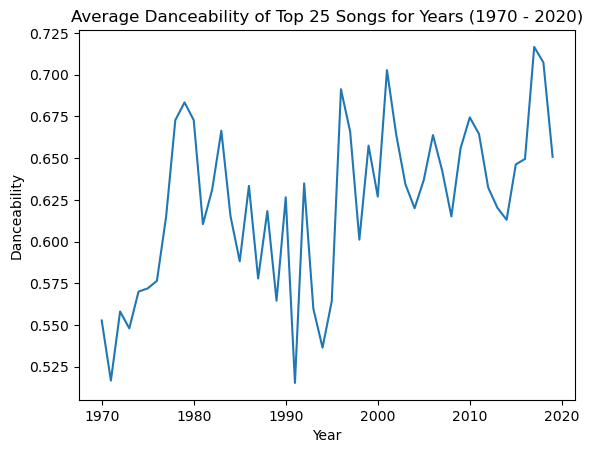

In [27]:
#Get the average Danceability Scores for each year
df_danceability_raw = df[['danceability','Year']]

danceability_avg = df_danceability_raw.groupby('Year')['danceability'].mean()

plt.plot(danceability_avg)
plt.xlabel('Year')
plt.ylabel('Danceability')
plt.title('Average Danceability of Top 25 Songs for Years (1970 - 2020)')


There is a slight upward trend in terms of the "Danceability" throughout the years. I would say this is because of the popularity of Electronic Music and it's impact it had on other genres too (i.e. Production Techniques). 

## Has the Duration of popular songs decreased throughout the years?

In [28]:
df[['Year','duration_ms']]

,Year,duration_ms
0,1970,243027
1,1970,174827
2,1970,199267
3,1970,147493
4,1970,134800
...,...,...
1245,2019,288624
1246,2019,190947
1247,2019,149547
1248,2019,190067


In [29]:
max(df['minutes'])

11

In [30]:
#Remove Outlier:
# df[df['minutes'] == 11] #'d Do Anything For Love (But I Won't Do That)

In [31]:
# df = df[df['minutes'] != 11]
max(df['minutes'])

11

In [32]:
#Function for formatting from milliseconds to minutes:seconds
def format_time(x, Year):
    minutes = int(x / 60000)
    seconds = int((x % 60000) / 1000)
    return f"{minutes:02d}:{seconds:02d}"

In [33]:
#Putting into a separate DF
df_time_avg = df[['duration_ms','Year']]

In [34]:
df_time_avg.describe()

,duration_ms,Year
count,1250.000000,1250.000000
mean,243800.919200,1994.500000
std,55027.483231,14.436646
min,92867.000000,1970.000000
25%,209499.750000,1982.000000
50%,235000.000000,1994.500000
75%,269900.000000,2007.000000
max,718600.000000,2019.000000


In [35]:
#Calculating average duration of all songs in a year
duration_avg = df_time_avg.groupby('Year')['duration_ms'].mean()

Text(0.5, 1.0, 'Average Duration of Top 25 Songs for Years (1970 - 2020)')

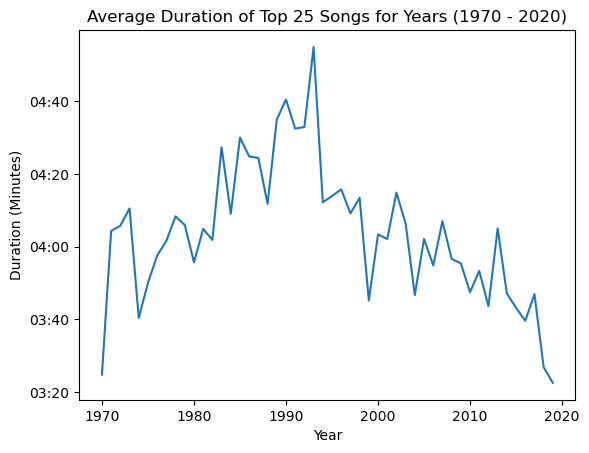

In [36]:
fig, ax = plt.subplots()
ax.plot(duration_avg)

# Set the y-axis formatter
ax.yaxis.set_major_formatter(ticker.FuncFormatter(format_time)) #FuncFormatter formats the y-axis to be minutes-seconds from the function created earlier
plt.xlabel('Year')
plt.ylabel('Duration (Minutes)')
plt.title('Average Duration of Top 25 Songs for Years (1970 - 2020)')

The years between 1970 - 1995 see a much larger average duration of popular songs than other times. 
There is a similar trend in average durations of songs seen post 2000s and pre 1990s (1990-1970).

The shorter duration of songs may be due to:
- Effectivness of current music making technology. Much more time and cost efficient to make shorter tracks, and make more tracks in general because of it
- Media Consumption: Because of streaming services etc. Users have shorter attention spans
- Different musical genres are popular now vs before. In the past popular genres were rock, jazz etc. where extended instrumental solos were popular

## How has the "Energy" of songs changed throughout the years?

Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

In [37]:
df_energy_avg = df[['energy','Year']]

In [38]:
df_energy_avg.describe()

,energy,Year
count,1250.00000,1250.000000
mean,0.66796,1994.500000
std,0.18903,14.436646
min,0.11100,1970.000000
25%,0.53525,1982.000000
50%,0.69200,1994.500000
75%,0.82100,2007.000000
max,0.98800,2019.000000


Text(0.5, 1.0, 'Average Energy of Top 25 Songs for Years (1970 - 2020)')

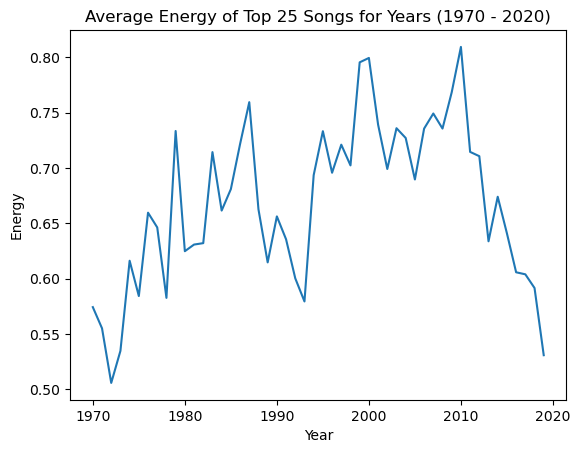

In [39]:
energy_avg = df_energy_avg.groupby('Year')['energy'].mean()

fig, ax = plt.subplots()
ax.plot(energy_avg)

plt.xlabel('Year')
plt.ylabel('Energy')
plt.title('Average Energy of Top 25 Songs for Years (1970 - 2020)')

The years 2000-2010 see the highest energy measure for the top tracks. This may be due to the prevelance of Electronic Music in the mainstream music (Y2k era especially) as mainy popular elecotronic music was considered fast and loud (e.g. Dubstep) 

## How has "Loudness" (dB) of Tracks Changed?

The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.

In [40]:
df_loudness_avg = df[['loudness','Year']]

In [41]:
df_loudness_avg.describe()

,loudness,Year
count,1250.000000,1250.000000
mean,-7.631249,1994.500000
std,3.419606,14.436646
min,-22.602000,1970.000000
25%,-9.795250,1982.000000
50%,-6.869500,1994.500000
75%,-5.034500,2007.000000
max,-0.140000,2019.000000


Text(0.5, 1.0, 'Average Loudness of Top 25 Songs for Years (1970 - 2020)')

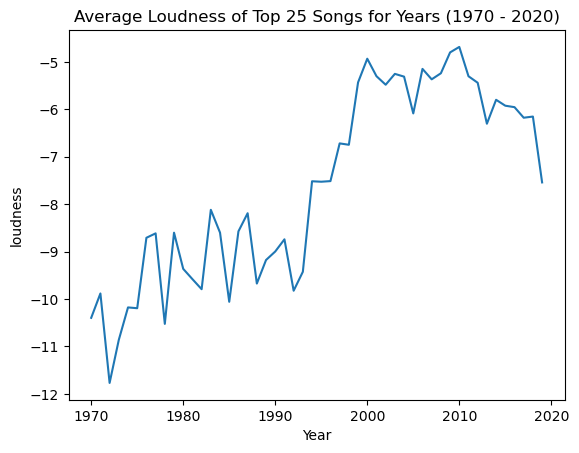

In [42]:

loudness_avg = df_loudness_avg.groupby('Year')['loudness'].mean()

fig, ax = plt.subplots()
ax.plot(loudness_avg)

plt.xlabel('Year')
plt.ylabel('loudness')
plt.title('Average Loudness of Top 25 Songs for Years (1970 - 2020)')

There is a noticable increase in the loudness of tracks in the last ~20 years compared to previous times. This could be explained by the increased value in making tracks louder for increased attention in radio and digital media. 
- https://en.wikipedia.org/wiki/Loudness_war

## Have the Key's of the Most Popular Songs in the last 25 years changed?

The key the track is in. Integers map to pitches using standard Pitch Class notation. 
E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.

In [43]:
#     C = 0, C#/Db = 1, D = 2, D#/Eb = 3, E =4,

#     F = 5, F#/Gb = 6, G = 7, G#/Ab = 8

#     A = 9, A#/Bb = 10, B =11
    
key_dict = {
    0:"C",
    1:"C#",
    2:"D",
    3:"D#",
    4:"E",
    5:"F",
    6:"F#",
    7:"G",
    8:"G#",
    9:"A",
    10:"A#",
    11:"B",
}
key_dict

{0: 'C',
 1: 'C#',
 2: 'D',
 3: 'D#',
 4: 'E',
 5: 'F',
 6: 'F#',
 7: 'G',
 8: 'G#',
 9: 'A',
 10: 'A#',
 11: 'B'}

In [44]:
# df[df['Year'] == 1970]['key'] #Test
((df.loc[df['Year'] == 1970, 'key'])).value_counts().idxmax()

9

In [45]:
key_year_count = df.groupby('Year')['key'].value_counts() #groupby('Year')

max_key_count = df.groupby('Year')['key'].value_counts().groupby('Year').idxmax() #Returns the index of the maximum value. i.e. Returns the key that has the maximum value

#Only take the key from the tuple
max_key = []
for tup in max_key_count:
    max_key.append(tup[1])


### Most Popular Key's used throughout the last 25 years

In [46]:
key_note =[*map(key_dict.get, max_key)] #*map applies the given function to each element of the list


In [47]:
pop_keys = (pd.Series(key_note)).value_counts()
pop_keys.index

Index(['C#', 'C', 'E', 'A', 'G', 'F', 'D', 'F#', 'B', 'A#'], dtype='object')

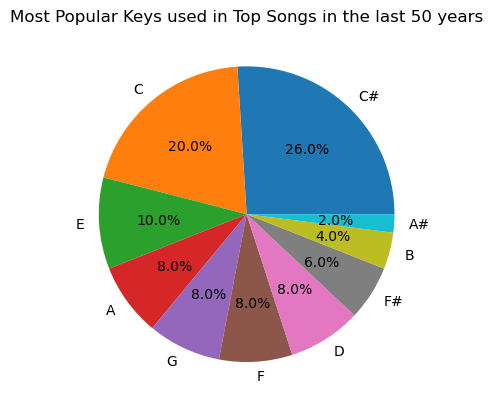

In [48]:
_ = plt.pie(pop_keys,labels=pop_keys.index,autopct="%.1f%%")
_ = plt.title('Most Popular Keys used in Top Songs in the last 50 years')

In [49]:
key_year = np.column_stack((year_arr, max_key))

In [50]:
# plt.plot(key_year[:,0],key_year[:,1])
# plt.xlabel('Year')
# plt.ylabel('Key')
# plt.title("Most Popular Key's of Top 25 Songs for Years (1970 - 2020)")

They Keys of Popular Tracks have remained relativily consistent. This is because the music that we have looked at in this project have been from Western Culture. The use of these Keys have remained dominant throughout history. 
Also, the repeated use of these Keys could be because of Familiarity. People like songs that make them have a positive feeling that they have associated with in the past. 

## Looking into the "Instrumentalness" of Top Tracks over the last 50 years

Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

In [51]:
df_instrumentalness_raw = df[['instrumentalness','Year']]


In [52]:
df_instrumentalness_raw.describe()

,instrumentalness,Year
count,1250.000000,1250.000000
mean,0.024071,1994.500000
std,0.105751,14.436646
min,0.000000,1970.000000
25%,0.000000,1982.000000
50%,0.000011,1994.500000
75%,0.000955,2007.000000
max,0.889000,2019.000000


In [53]:
#Get the average instrumentalness Scores for each year
instrumentalness_avg = df_instrumentalness_raw.groupby('Year')['instrumentalness'].mean()

Text(0.5, 1.0, 'Average Instrumentalness of Top 25 Songs for Years (1970 - 2020)')

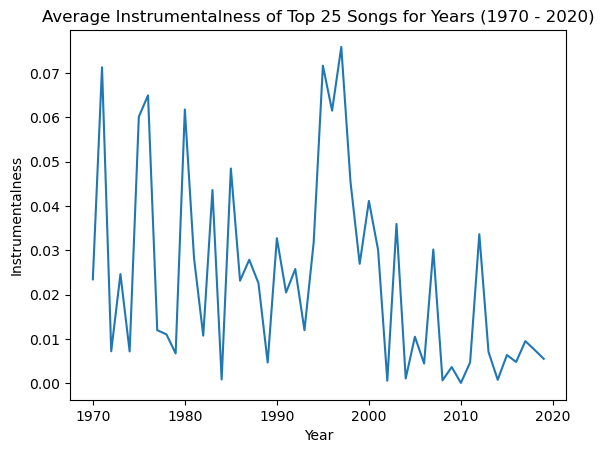

In [54]:
plt.plot(instrumentalness_avg)
plt.xlabel('Year')
plt.ylabel('Instrumentalness')
plt.title('Average Instrumentalness of Top 25 Songs for Years (1970 - 2020)')


Overall, the top tracks all have vocal components to it. The earlier years saw more instrumentalness than recent years, this may be due to the longer duration of the songs as they often had instrumental breakdowns, especially in rock, funk, disco, jazz, and others. Also, recent times have seen a large % of top songs being rap, this may explain the large decrease in the "instrumentalness" of a song in the last decade.

E.g. Stairway to Heaven - Led Zepplin had an iconic Guitar Solo.

## What Artists have appeared in the Top 25 Songs the most frequent?

In [55]:
artist_df = df[['Year','Artists','Name']]
artist_df

,Year,Artists,Name
0,1970,[The Beatles],Let It Be - Remastered 2009
1,1970,[Simon & Garfunkel],Cecilia
2,1970,[Aretha Franklin],Son of a Preacher Man
3,1970,[Creedence Clearwater Revival],Who'll Stop The Rain
4,1970,[Joni Mitchell],Big Yellow Taxi
...,...,...,...
1245,2019,[21 Savage],a lot
1246,2019,[Panic! At The Disco],High Hopes
1247,2019,[Post Malone],Wow.
1248,2019,"[Tyler, The Creator]",EARFQUAKE


In [56]:
#Used to check which Tracks contained multiple artists

# artist_df['NumArtists'] = artist_df['Artists'].apply(len) #
# multiple_artists_df = artist_df[artist_df['NumArtists'] > 1]
# multiple_artists_df

In [57]:
#Separate the Artists for tracks which contain multiple of them

artists_df = artist_df.explode('Artists') #Transforms col containing lists into multiple rows if that list has multiple values
len(artists_df)


# artists_df.loc[artists_df['Artists'] == 'Swae Lee']

1461

In [58]:
#Count the number of times they appear
artist_count = artists_df['Artists'].value_counts()
artist_count

Rihanna               23
Eminem                17
ABBA                  13
Coldplay              12
Kanye West            12
                      ..
Jon Bon Jovi           1
Go West                1
James                  1
Vanilla Ice            1
Tyler, The Creator     1
Name: Artists, Length: 748, dtype: int64

In [59]:
#Plot top 10 artists
top_10_artists = artist_count.head(10)

Text(0, 0.5, '# of times appeared on Top 25 Songs of the Year')

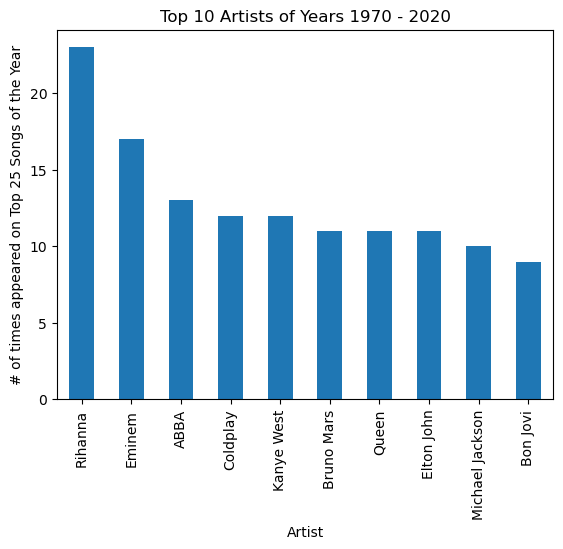

In [60]:
top_10_artists.plot.bar()
plt.title('Top 10 Artists of Years 1970 - 2020')
plt.xlabel('Artist')
plt.ylabel('# of times appeared on Top 25 Songs of the Year')

In [61]:
#Years that the top 10 artists were in the top 25 for
artists_10 = top_10_artists.index
ar_range_arr = []
for artist in artists_10:
    ar_range = artists_df.loc[artists_df['Artists'] == artist]
    
    ar_range_arr.append(ar_range)

artists_years_df = pd.concat(ar_range_arr)
artists_years_df

,Year,Artists,Name
878,2005,Rihanna,Pon de Replay
905,2006,Rihanna,SOS
926,2007,Rihanna,Umbrella
952,2008,Rihanna,Take A Bow
961,2008,Rihanna,Don't Stop The Music
...,...,...,...
466,1988,Bon Jovi,Bad Medicine
494,1989,Bon Jovi,I'll Be There For You
594,1993,Bon Jovi,Bed Of Roses
602,1994,Bon Jovi,Always


In [62]:
#Number of top 25 songs by Year and Artist

    #Want to use a stacked bar chart
        #Y axis represents how many songs were in the top 25 for that year
        #X Axis represents the Years
        #The bars Represent the Artists

#Group the artists and the years while finding how many songs they had in the top that year
grouped_data = artists_years_df.groupby(['Year', 'Artists']).size().reset_index(name='Count') #Size returns number of rows in each group
grouped_data

,Year,Artists,Count
0,1971,Elton John,1
1,1972,Elton John,2
2,1973,Elton John,3
3,1974,ABBA,2
4,1974,Elton John,1
...,...,...,...
80,2016,Coldplay,1
81,2016,Rihanna,3
82,2017,Bruno Mars,1
83,2017,Coldplay,1


In [63]:
#Rows are Years, Columns are Artists and the values are how many times they had a top 25 song that year
table = pd.pivot_table(grouped_data, values='Count', index='Year',columns=['Artists'], fill_value=0)
table

Artists,ABBA,Bon Jovi,Bruno Mars,Coldplay,Elton John,Eminem,Kanye West,Michael Jackson,Queen,Rihanna
Year,,,,,,,,,,
1971,0,0,0,0,1,0,0,0,0,0
1972,0,0,0,0,2,0,0,0,0,0
1973,0,0,0,0,3,0,0,0,0,0
1974,2,0,0,0,1,0,0,0,1,0
1975,2,0,0,0,0,0,0,0,1,0
1976,3,0,0,0,1,0,0,0,2,0
1977,0,0,0,0,0,0,0,0,1,0
1978,1,0,0,0,0,0,0,0,0,0
1979,2,0,0,0,0,0,0,1,1,0


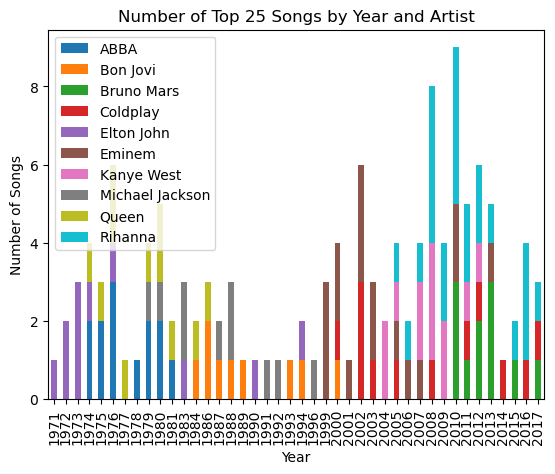

In [64]:
#Plot the stacked bar chart
_ = table.plot(kind='bar', stacked=True,
        title='Number of Top 25 Songs by Year and Artist', xlabel = 'Year', ylabel = 'Number of Songs', legend = 'Artist')
_.legend(loc='upper left')

# Hypothesis Testing

## Question: Have tracks from the last decade have been shorter than those 50 years ago?

- One sided test - Looking at whether tracks have been shorter
- Null Hypothesis - The average length Tracks from the last decade are the same length as those from 50 years ago on average
- Alternative - The tracks are shorter than 50 years ago

Take a sample of 25 songs of each year from the last 10 years (2010 - 2020)
AND
Sample of 25 songs of each year from 1970-1980

T-Test since we dont have population mean or std

In [65]:
df_time = df[['duration_ms','Year']]

In [66]:
df_time_1970_1980 = df_time[(df_time['Year'] >= 1970) & (df_time['Year'] < 1980)]

In [67]:
df_time_1970_1980.describe()

,duration_ms,Year
count,250.000000,250.000000
mean,236926.624000,1974.500000
std,62688.869684,2.878043
min,92867.000000,1970.000000
25%,196557.000000,1972.000000
50%,223740.000000,1974.500000
75%,274066.000000,1977.000000
max,515867.000000,1979.000000


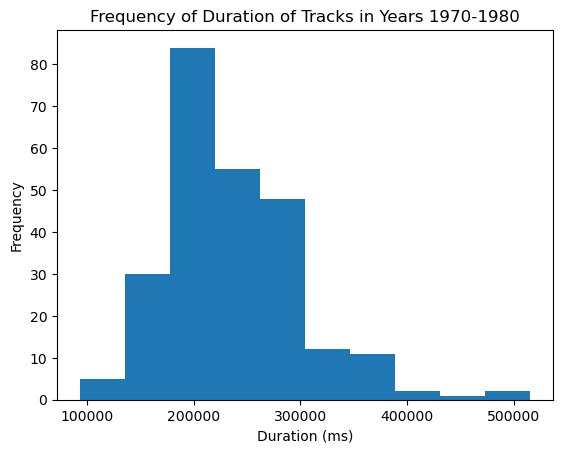

In [68]:
#Check if normally distributed
plt.hist(df_time_1970_1980['duration_ms'])
plt.xlabel('Duration (ms)')
plt.ylabel('Frequency')
plt.title('Frequency of Duration of Tracks in Years 1970-1980')
plt.show()

In [69]:
df_time_2010_2020 = df_time[(df_time['Year'] >= 2010) & (df_time['Year'] < 2020)]

In [70]:
df_time_2010_2020.describe()

,duration_ms,Year
count,250.000000,250.000000
mean,223549.868000,2014.500000
std,37547.731628,2.878043
min,119133.000000,2010.000000
25%,200322.750000,2012.000000
50%,219226.500000,2014.500000
75%,239777.000000,2017.000000
max,484147.000000,2019.000000


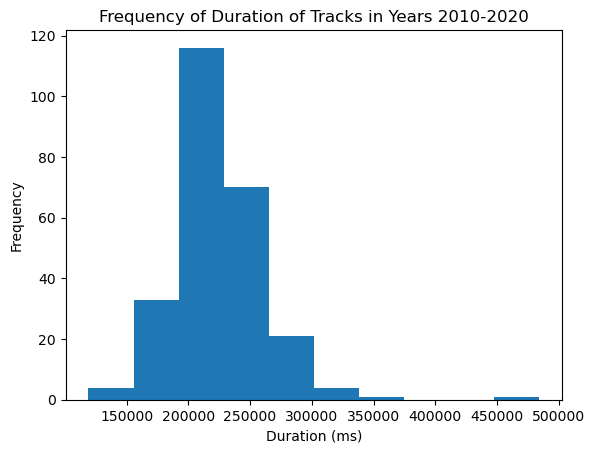

In [71]:
#Check if normally distributed
plt.hist(df_time_2010_2020['duration_ms'])
plt.xlabel('Duration (ms)')
plt.ylabel('Frequency')
plt.title('Frequency of Duration of Tracks in Years 2010-2020')
plt.show()

In [72]:
df_time_1970_1980['duration_ms']

0      243027
1      174827
2      199267
3      147493
4      134800
        ...  
245    295400
246    243373
247    200480
248    223867
249    216733
Name: duration_ms, Length: 250, dtype: int64

In [73]:
# means
old_mean = np.mean(df_time_1970_1980['duration_ms'])
print('Mean for 1970-1980: ', old_mean)
new_mean = np.mean(df_time_2010_2020['duration_ms'])
print('Mean for 2010-2020: ', new_mean)

Mean for 1970-1980:  236926.624
Mean for 2010-2020:  223549.868


In [74]:
#Standard Deviation
# sample standard deviation (set delta degrees of freedom to 1)
s_old = np.std(df_time_1970_1980['duration_ms'], ddof=1)
print('Std for 1970-1980: ', s_old)
s_new = np.std(df_time_2010_2020['duration_ms'], ddof=1)
print('Std for 1970-1980: ', s_new)

Std for 1970-1980:  62688.86968382477
Std for 1970-1980:  37547.73162837299


In [75]:
# Compute the t score
t_statistic, p_value = stats.ttest_ind(df_time_1970_1980['duration_ms'], df_time_2010_2020['duration_ms'], equal_var=False)

if p_value < 0.05:
    print("Reject Null Hypothesis: The average length of tracks in the last decade is shorter than the average length of tracks 50 years ago.")
else:
    print("Failed to reject Null Hypothesis: There is insufficient evidence to reject the null hypothesis. ")

print("P-Value:", p_value)
print("T-statistic", t_statistic)

Reject Null Hypothesis: The average length of tracks in the last decade is shorter than the average length of tracks 50 years ago.
P-Value: 0.004002893593773003
T-statistic 2.8944183429991606


# Conclusion
Using the Spotify Web API to gather the Top 25 songs of each year from 1970-2020 and looking at the **Feature Information** of the tracks and analysing any trends in songs attributes seen over the years.


- **Key Findings:**
    - *Averages of Key Attributes were taken for top 25 songs and plotted against year.*
        - Upward trend of the "Danceability" throughout the years
        - Duration of Tracks has seen a decline in recent times
        - Similar Keys have been consitently used throughout the years (Keys = Pitch of the song)
        - Earlier years saw more Instrumental heavy parts of songs than recent times
        - The Energy of songs has seen a decline in recent top songs
        - The "Loudness War" is seen in the trend of how much louder songs are now relative to earlier times
        - Rihanna had the highest amount of songs in the top 25 in the last 50 years
    - *Songs in the last Decade are shorter than those in the 1970s (1970-1980)*. Which was backed up by the rejection of the H0 